<a href="https://colab.research.google.com/github/jinay780/python/blob/master/Boston_house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('HousingData.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
data.shape

(506, 14)

In [4]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

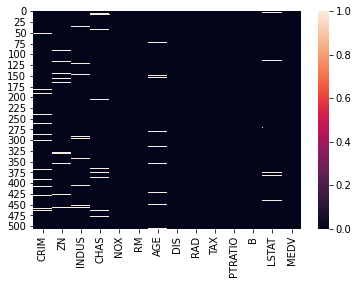

In [5]:
sns.heatmap(data.isnull())

In [6]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

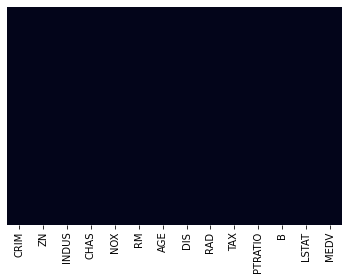

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [11]:
price=data['MEDV']
features=data.drop('MEDV',axis=1)

In [13]:
maximum_price=price.max()
minimum_price=price.min()
mean_price=price.mean()
median_price=price.median()
std=price.std()

In [14]:
print('Maximum price:{}'.format(maximum_price))
print('Minimum price:{}'.format(minimum_price))
print('Mean price:{}'.format(mean_price))
print('Median price:{}'.format(median_price))
print('Std price:{}'.format(std))

Maximum price:50.0
Minimum price:5.0
Mean price:22.35964467005079
Median price:21.05
Std price:9.142979112356754


In [16]:
data[["RM", "MEDV"]].corr(method="pearson")

,RM,MEDV
RM,1.000000,0.723951
MEDV,0.723951,1.000000


In [17]:
data[["LSTAT", "MEDV"]].corr(method="pearson")

,LSTAT,MEDV
LSTAT,1.00000,-0.74345
MEDV,-0.74345,1.00000


In [18]:
data[["PTRATIO", "MEDV"]].corr(method="pearson")

,PTRATIO,MEDV
PTRATIO,1.000000,-0.543809
MEDV,-0.543809,1.000000


In [21]:
X=data.drop('MEDV',axis=1)
y=data['MEDV']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [33]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_pred=model.predict(X_test)

In [39]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.7198712737477139

In [44]:
from sklearn.ensemble import RandomForestRegressor
clf=RandomForestRegressor(n_estimators=5,criterion='mse')
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
y_pred=clf.predict(X_test)
score=r2_score(y_test,y_pred)
score

0.7954175324836398